# Pazy wing static twisting results

The following test case results consit in the Pazy wing being loaded with a lumped mass at the wing-tip at a position 80 mm ahead of the leading edge.

Available data sets include:
  * `torsion_SHARPy_w_skin.txt`: SHARPy results with skin. First column is wing tip lumped mass in kg, second column the wing-tip mid-chord vertical displacement and the third column is the twist angle in degrees (negative meaning washout)
  * `torsion_SHARPy_wo_skin.txt`: SHARPy results without skin. Same format as above
  * `torsion_Technion_MRM_w_skin.txt`: Technion's MRM with skin results. Same format as above.
  * `torsion_Technion_MRM_wo_skin.txt`: MRM with no skin. Same format as above.
  * `torsion_Technion_Experimental.txt`: experimental data set for the wing with the skin on. Same format as above
  
Version Control:
  * SHARPy version: v1.1.1-234-g37298ed-37298ed
  * Pazy wing model version: 5036cbd0fca0765d2602a9bec8442e1c83c82212
  * Test script version: 875cf2d9fc4803425fcd8cbe9edc014ac39806e2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [8]:
torsion_results = {}
torsion_results['sharpy_w_skin'] = {'file':'./torsion_SHARPy_w_skin.txt',
                                    'skin': True,
                                    'marker': 'o',
                                    'ms': 6,
                                   'label':'SHARPy w/ skin'}
torsion_results['sharpy_wo_skin'] = {'file':'./torsion_SHARPy_wo_skin.txt',
                                     'skin': False,
                                     'marker': 'o',
                                     'ms': 6,
                                    'label': 'SHARPy w/o skin'}
torsion_results['technion_mrm_w_skin'] = {'file':'./torsion_Technion_MRM_w_skin.txt',
                                          'skin': True,
                                          'marker': 'x',
                                          'ms': 6,
                                         'label': 'MRM w/skin'}
torsion_results['technion_mrm_wo_skin'] = {'file':'./torsion_Technion_MRM_wo_skin.txt',
                                           'marker': 'x',
                                           'ms': 6,
                                           'skin': False,
                                          'label': 'MRM w/o skin'}
torsion_results['technion_experimental'] = {'file':'./torsion_Technion_Experimental.txt',
                                            'skin': True,
                                           'label': 'Technion Experimental',
                                           'marker': 's',
                                            'ms': 6,
                                            'ls':'none'
                                           }

In [9]:
for key, case in torsion_results.items():
    case['data'] = np.loadtxt(case['file'])


## Vertical Wing tip displacement

Vertical displacement at the mid-chord

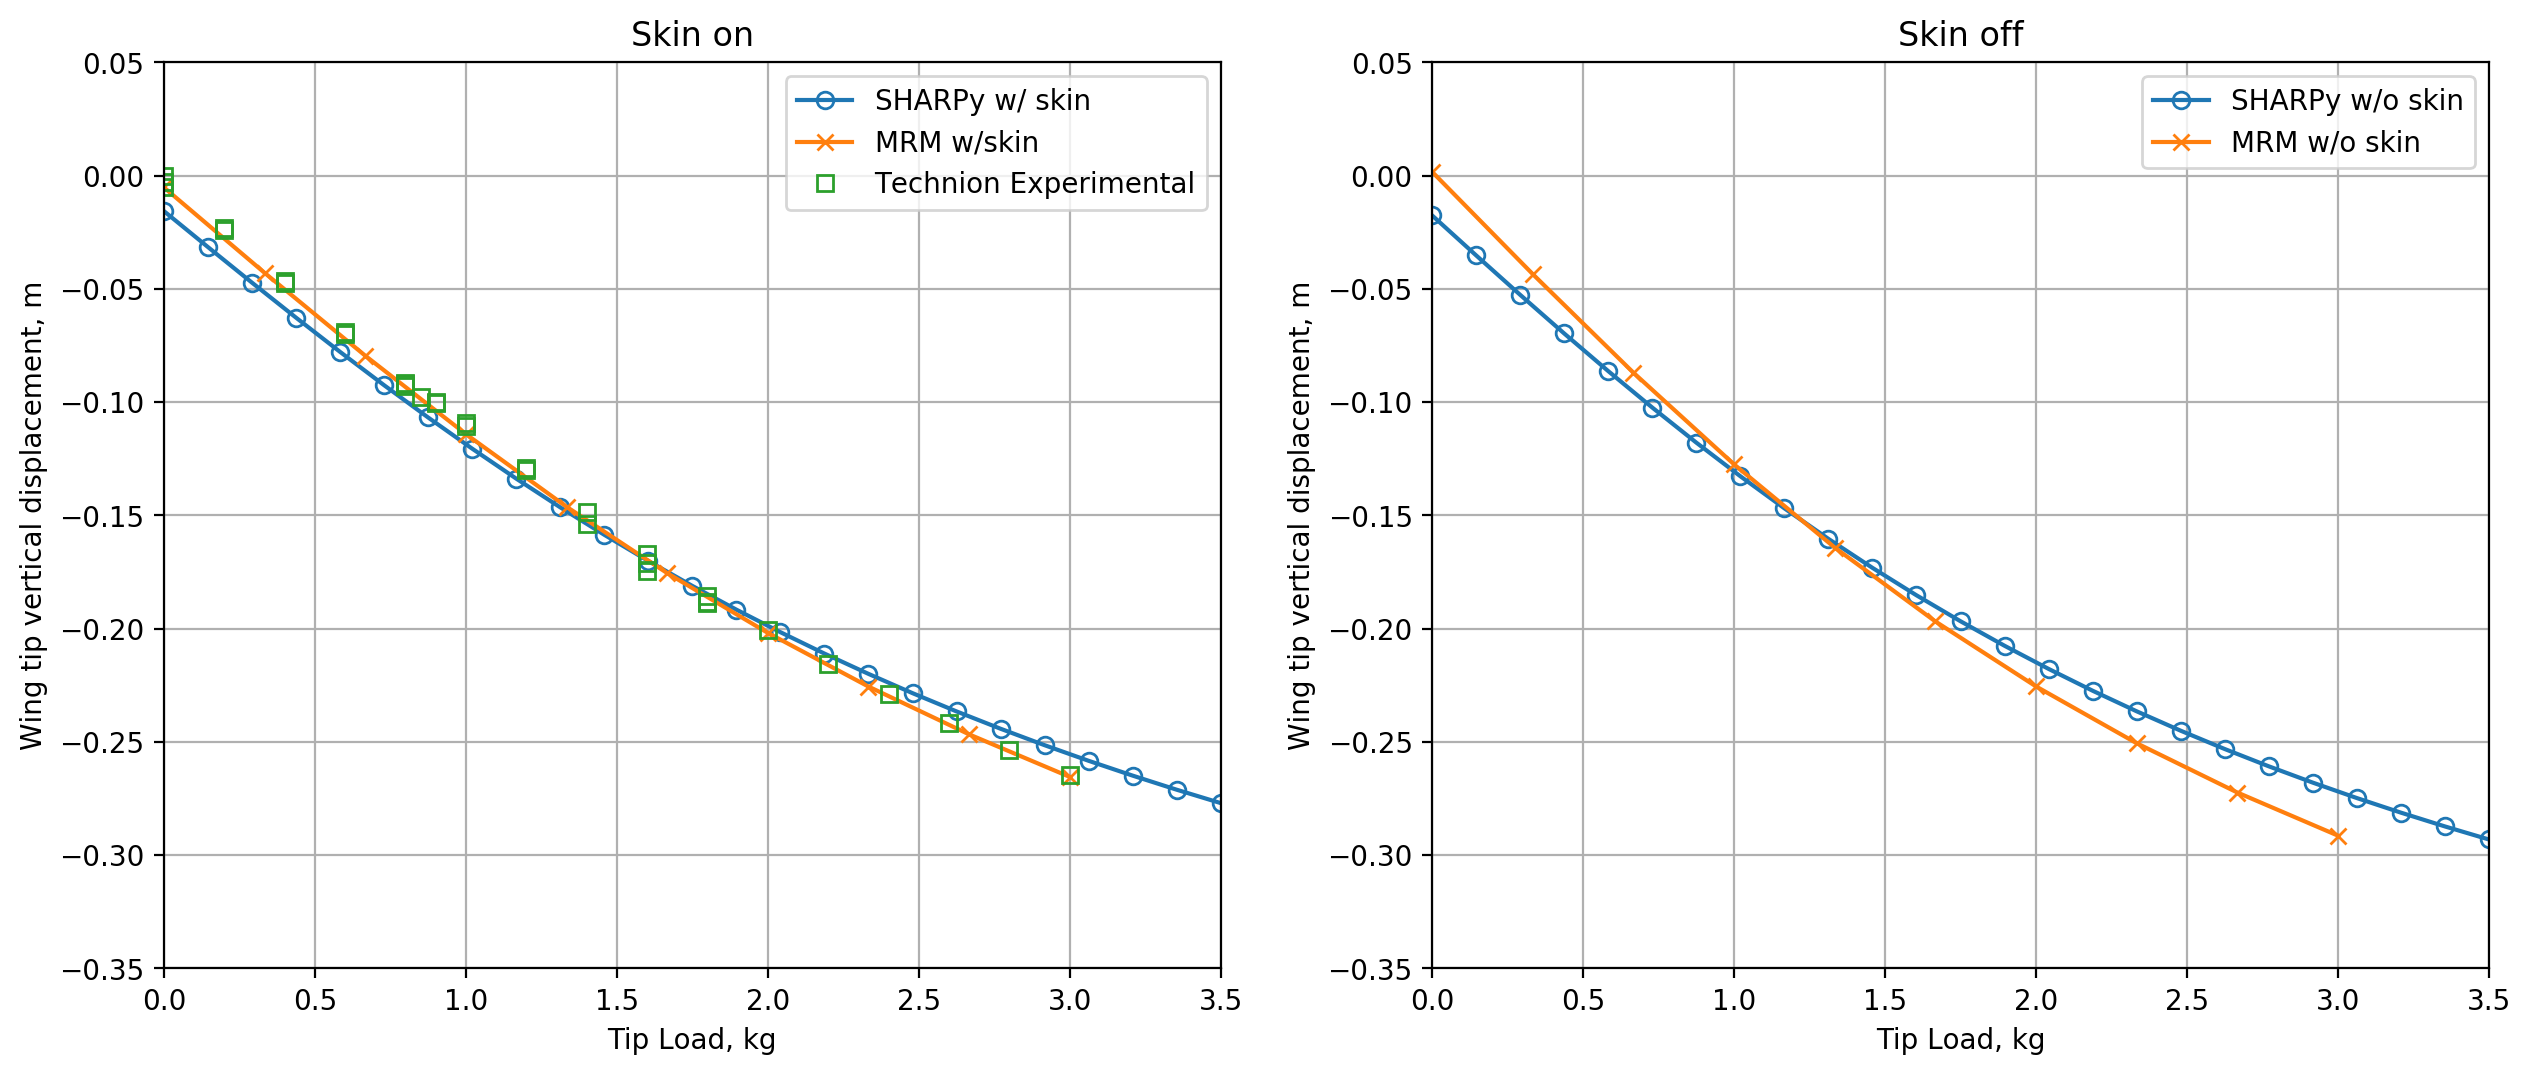

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

for case in torsion_results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 1], label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))

for a in ax:
    a.legend()
    a.set_xlim(0, 3.5)
    a.set_ylim(-0.35, 0.05)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('Wing tip vertical displacement, m')
    a.grid()

ax[0].set_title('Skin on')
ax[1].set_title('Skin off');

## Twist Angle

The twist angle at the wing tip node is shown below. 

The SHARPy twist angle has been computed by gathering the coordinates of the leading and trailing edges and finding the angle with respect to the horizontal. For the `skin off` case, the initial offset present in the MRM data set has been included to ease the comparison.

In [12]:
torsion_results['sharpy_wo_skin']['data'][:, 2] += torsion_results['technion_mrm_wo_skin']['data'][0, 2]

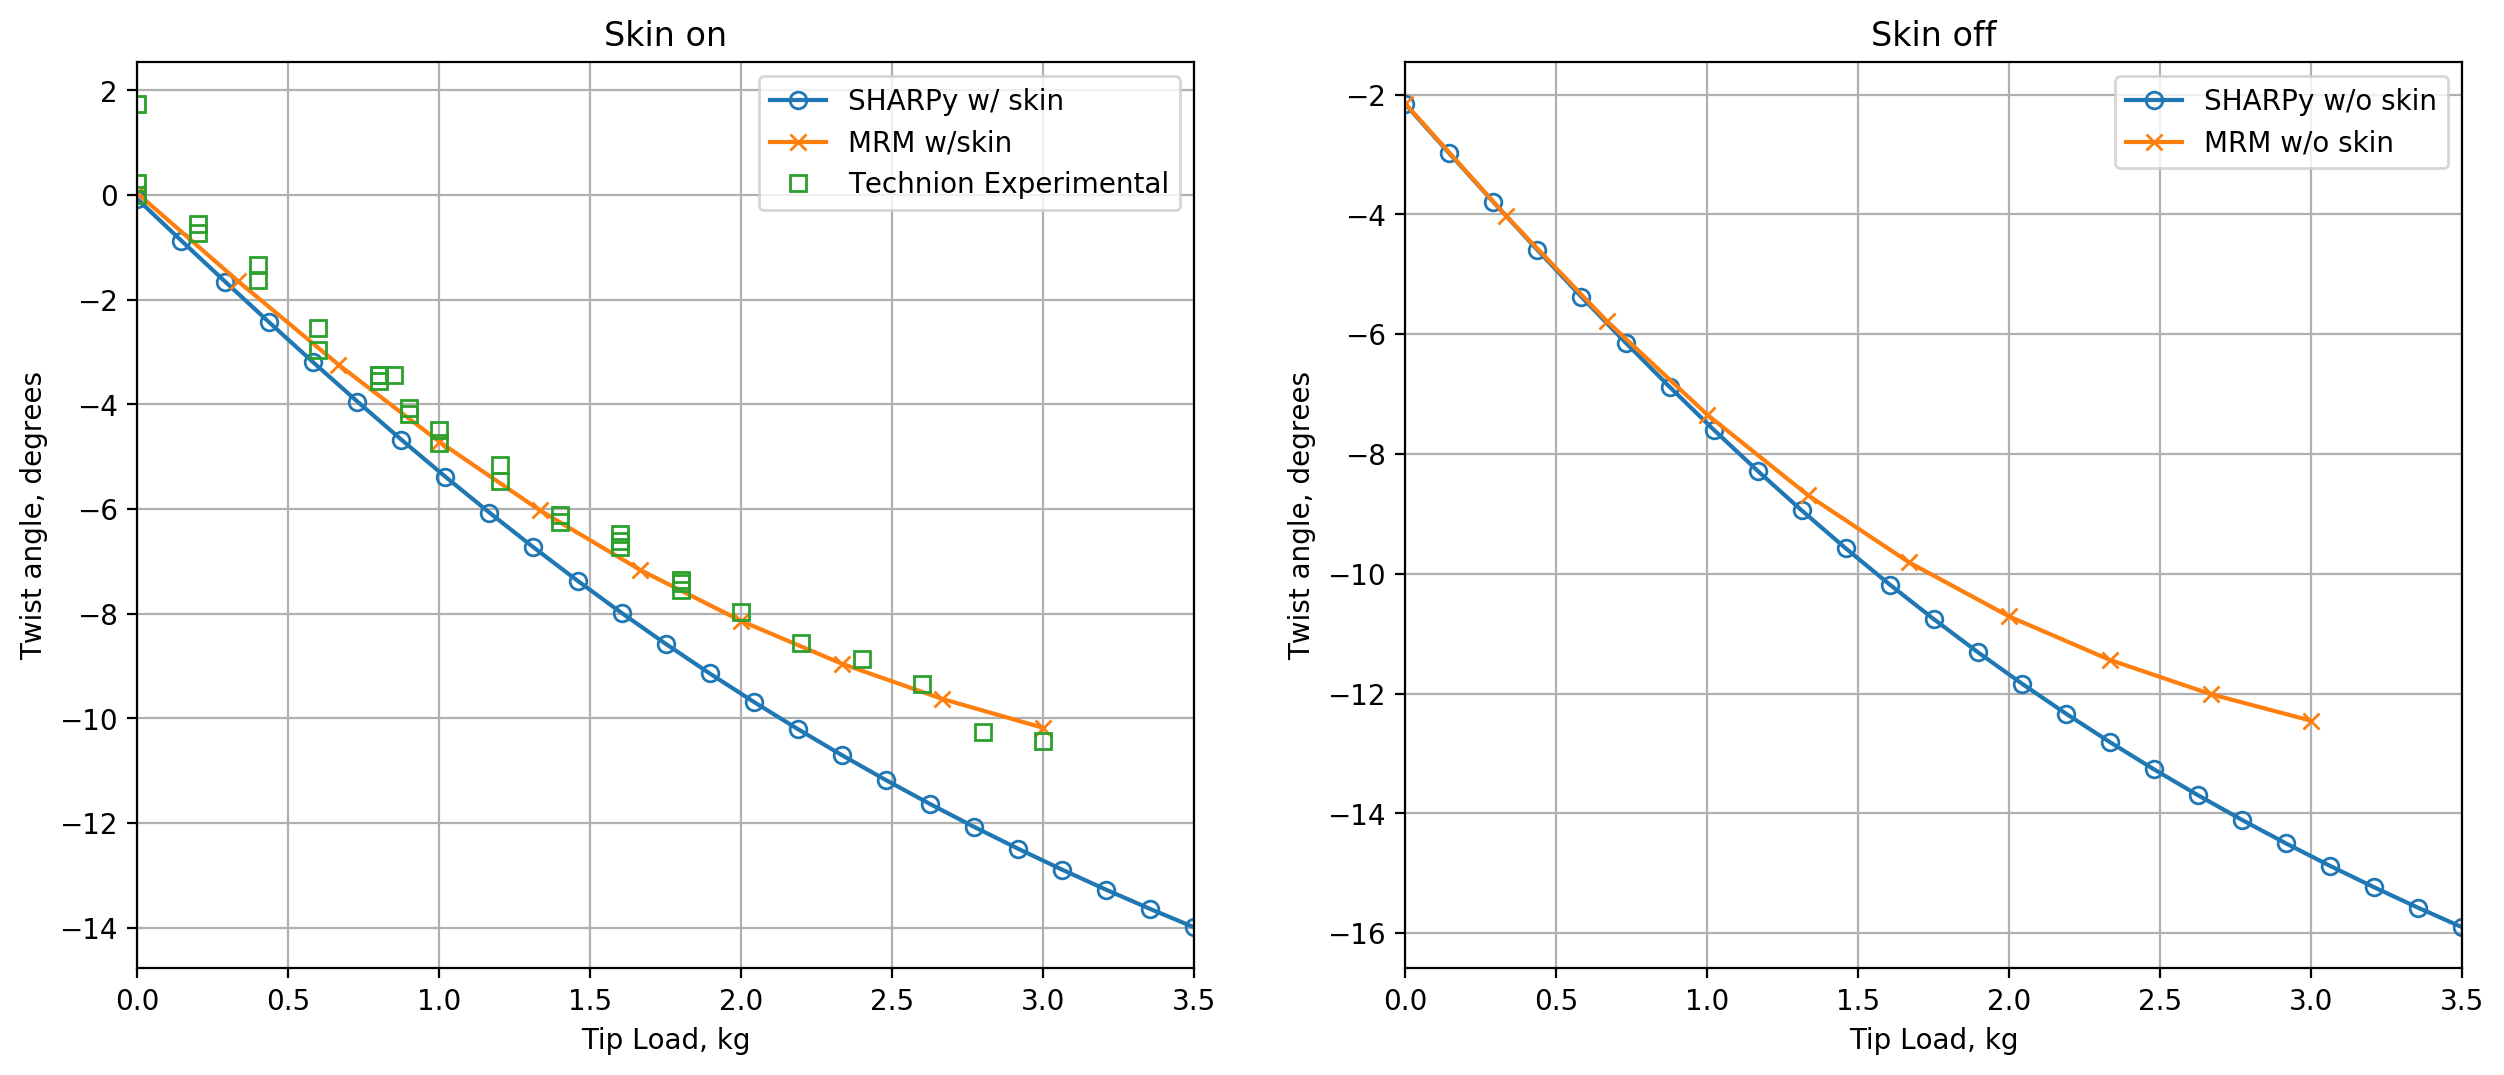

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

for case in torsion_results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 2], label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))

for a in ax:
    a.legend()
    a.set_xlim(0, 3.5)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('Twist angle, degrees')
    a.grid()

ax[0].set_title('Skin on')
ax[1].set_title('Skin off');